This is homework N°6 of the TC5 course in the master AIC.
#### Student: Taycir YAHMED

In [3]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import fftpack
from scipy import signal

# Contour detection

In [9]:
img = cv2.imread('car_no_noise.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img_cont = cv2.drawContours(img, contours, -1, (0,255,0), 3)

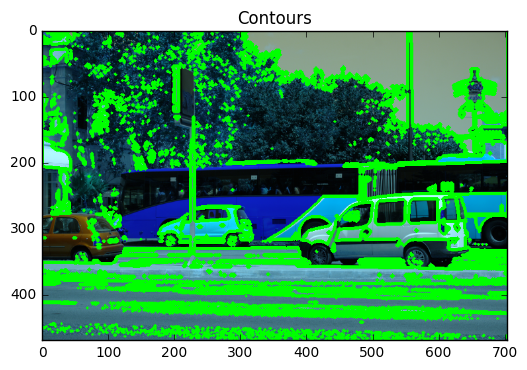

In [10]:
plt.imshow(img_cont);
plt.title('Contours');

# Noise estimation

In [4]:
img = cv2.imread('barbara.png',0)

In [5]:
tx , ty = img.shape
dctcoeff = np.zeros((519,519, 64))
for k in xrange (0,8):
    for l in xrange(0,8):
        mask = np.zeros((8,8))
        mask[k,l] = 1
        mask = fftpack.dct(fftpack.dct(mask.T).T)
        dctcoeff[:,:,l+(k-1)*8] = signal.convolve2d(img, mask)     

# Specification vs. Midway

### Midaway 

In [7]:
img1 = cv2.imread('barbara.png',0)
img2 = cv2.imread('house.png', 0)

In [12]:
def midway_eq(u,v):
    
    u_f = u.flatten()
    v_f = v.flatten()
    u_index = np.argsort(u_f)
    v_index = np.argsort(v_f)
    u_sorted = np.sort(u_f)
    v_sorted = np.sort(v_f)
    
    u_midway =  np.zeros(u_f.shape)
    v_midway =  np.zeros(v_f.shape)
    
    u_midway[u_index] = (u_sorted + v_sorted)/2
    v_midway[v_index] = (u_sorted + v_sorted)/2
    
    return u_midway.reshape(u.shape), v_midway.reshape(v.shape)

In [13]:
u_n , v_n = midway_eq(img1, img2)

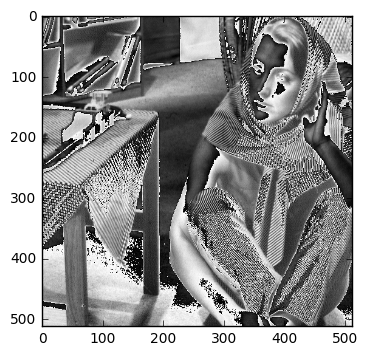

In [14]:
plt.imshow(u_n, cmap='gray');

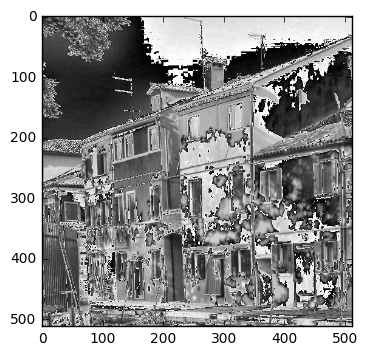

In [15]:
plt.imshow(v_n, cmap='gray');

### Histogram specification method

In [8]:
hist,bins = np.histogram(img1.flatten(),256,[0,256])
cdf = hist.cumsum()

In [9]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [10]:
img2_eq = cdf[img2]

In [12]:
res = np.hstack((img2,img2_eq))

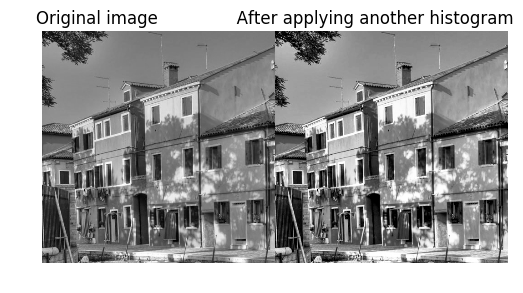

In [20]:
plt.imshow(res, cmap='gray');
plt.axis('off');
plt.title("Original image               After applying another histogram");

# Theoretical questions
### 1. $H(z) = 1 - \frac{1}{2}z^{-1}$

$RI = H(z) = \frac{P(z^{-1})}{Q(z^{-1})}$ with $P(z)=1 - \frac{1}{2}z$ and $Q(z)=1$

The recurrence relation : $1 =  x_{n} - \frac{1}{2}  x_{n-1}$ 

### 2. $H(z) = 1 + 2 z^{-1} + 3 z^{-2}$

$RI = H(z) = \frac{P(z^{-1})}{Q(z^{-1})}$ with $P(z)=1 + 2 z + 3 z^{2}$ and $Q(z)=1$

The recurrence relation : $1 =  x_{n} + 2  x_{n-1} + 3 x_{n-2}$ 

### 3. $H(z) = \frac{1}{1 - \frac{1}{2}z^{-1}}$

$RI = H(z) = \frac{P(z^{-1})}{Q(z^{-1})}$ with $Q(z)=1 - \frac{1}{2}z$ and $P(z)=1$

The recurrence relation : $1 =  y_{n} - \frac{1}{2}  y_{n-1}$ 

### 4. $H(z) = \frac{1}{1 - 2 z^{-1}}$

$RI = H(z) = \frac{P(z^{-1})}{Q(z^{-1})}$ with $Q(z)=1 - 2z$ and $P(z)=1$

The recurrence relation : $1 =  y_{n} - 2  y_{n-1}$ 

